# top n reccommendation system

In [1]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer , CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt
from PIL import Image
import requests
from io import BytesIO
from ast import literal_eval
from nltk.stem.snowball import SnowballStemmer
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [2]:
def img_show_indices( product_indices):
    fig, axs = plt.subplots(1, 10,figsize=(18,4))
    fig.suptitle('You may also like these products', size = 22)
    i = 0
    for ind in product_indices:
        response = requests.get(literal_eval(df2['imageURLHighRes'][ind])[0])
        img = Image.open(BytesIO(response.content))
        axs[i].imshow(img)
        axs[i].axis("off")
        axs[i].set_title('{}  '.format(round(df2['vote_average'][ind],2)),y=-0.18,color="red",fontsize=18)
        i = i+1
        fig.show()
    

In [3]:
def img_show_asin(asin):
    response = requests.get(literal_eval(df2[df2['asin'] == asin]['imageURLHighRes'].values[0])[0])
    img = Image.open(BytesIO(response.content))
    plt.imshow(img)
    plt.title(label= '{}  '.format(round(df2[df2['asin'] == asin]['vote_average'].values[0],2)) ,
          loc="right",
          color='red' , fontsize=18)
    plt.axis('off')
    plt.show()
    

In [5]:
df2= pd.read_csv(r'C:\Users\Sigma\ecommerce\metadata_votecount5451.csv')
df3= pd.read_csv(r'C:\Users\Sigma\ecommerce\ratings8000.csv')
df2['vote_average'].value_counts()


3.000000    605
4.000000    451
3.500000    370
2.500000    293
2.000000    257
           ... 
3.019152      1
2.979275      1
3.789474      1
3.266067      1
3.873684      1
Name: vote_average, Length: 654, dtype: int64

In [6]:
C= df2['vote_average'].mean()
m= df2['vote_count'].quantile(0.9)
df22 = df2.copy().loc[df2['vote_count'] >= m]

In [7]:
dataFramePhone = df22[df22['category'].str[2:27] == 'Cell Phones & Accessories']

dataFrameAppliances = df22[df22['category'].str[2:12] == 'Appliances']
dataFrameSports = df22[df22['category'].str[2:19] == 'Sports & Outdoors']


In [8]:
dataFramePhone

category  \
1    ['Cell Phones & Accessories', 'Accessories', '...   
7    ['Cell Phones & Accessories', 'Accessories', '...   
21   ['Cell Phones & Accessories', 'Accessories', '...   
28   ['Cell Phones & Accessories', 'Accessories', '...   
73   ['Cell Phones & Accessories', 'Cases, Holsters...   
78   ['Cell Phones & Accessories', 'Accessories', '...   
80   ['Cell Phones & Accessories', 'Cases, Holsters...   
92   ['Cell Phones & Accessories', 'Accessories', '...   
94   ['Cell Phones & Accessories', 'Cases, Holsters...   
97   ['Cell Phones & Accessories', 'Accessories', '...   
115  ['Cell Phones & Accessories', 'Cases, Holsters...   
122  ['Cell Phones & Accessories', 'Cases, Holsters...   
128  ['Cell Phones & Accessories', 'Cases, Holsters...   
148  ['Cell Phones & Accessories', 'Accessories', '...   
158  ['Cell Phones & Accessories', 'Cases, Holsters...   
167  ['Cell Phones & Accessories', 'Accessories', '...   
170  ['Cell Phones & Accessories', 'Accessories', '...   
206  ['Cell Phones & Accessories', 'Cases, Holsters...   
211  ['Cell Phones & Accessories', 'Accessories', '...   
226  ['Cell Phones & Accessories', 'Accessories', '...   
265  ['Cell Phones & Accessories', 'Accessories', '...   
276  ['Cell Phones & Accessories', 'Accessories', '...   
281  ['Cell Phones & Accessories', 'Accessories', '...   
282  ['Cell Phones & Accessories', 'Accessories', '...   
309  ['Cell Phones & Accessories', 'Accessories', '...   
321  ['Cell Phones & Accessories', 'Cases, Holsters...   
331  ['Cell Phones & Accessories', 'Accessories', '...   
333  ['Cell Phones & Accessories', 'Accessories', '...   
337  ['Cell Phones & Accessories', 'Accessories', '...   
369  ['Cell Phones & Accessories', 'SIM Cards & Pre...   
387  ['Cell Phones & Accessories', 'Accessories', '...   
406  ['Cell Phones & Accessories', 'Accessories', '...   
413  ['Cell Phones & Accessories', 'Cases, Holsters...   
457  ['Cell Phones & Accessories', 'Accessories', '...   
472  ['Cell Phones & Accessories', 'Accessories', '...   
477  ['Cell Phones & Accessories', 'Accessories', '...   
478  ['Cell Phones & Accessories', 'Accessories', '...   
500  ['Cell Phones & Accessories', 'Accessories', '...   
513  ['Cell Phones & Accessories', 'Accessories', '...   
515  ['Cell Phones & Accessories', 'Cases, Holsters...   
516  ['Cell Phones & Accessories', 'Cases, Holsters...   
533  ['Cell Phones & Accessories', 'Accessories', '...   
540  ['Cell Phones & Accessories', 'Accessories', '...   
543  ['Cell Phones & Accessories', 'Accessories', '...   
548  ['Cell Phones & Accessories', 'Accessories', '...   
616  ['Cell Phones & Accessories', 'Accessories', '...   
650  ['Cell Phones & Accessories', 'Accessories', '...   
670  ['Cell Phones & Accessories', 'Accessories', '...   
684  ['Cell Phones & Accessories', 'Accessories', '...   
715  ['Cell Phones & Accessories', 'Accessories', '...   
732  ['Cell Phones & Accessories', 'Accessories', '...   
760  ['Cell Phones & Accessories', 'Accessories', '...   
761  ['Cell Phones & Accessories', 'Accessories', '...   
788  ['Cell Phones & Accessories', 'Accessories', '...   

                                                 tech1  \
1     class="a-keyvalue prodDetTable" role="present...   
7                                                  NaN   
21    class="a-keyvalue prodDetTable" role="present...   
28                                                 NaN   
73                                                 NaN   
78                                                 NaN   
80                                                 NaN   
92    class="a-keyvalue prodDetTable" role="present...   
94                                                 NaN   
97                                                 NaN   
115                                                NaN   
122                                                NaN   
128                                                NaN   
148                                        

In [9]:
def weighted_rating(x, m=m, C=C):
    v = x['vote_count']
    R = x['vote_average']
    return (v/(v+m) * R) + (m/(m+v) * C)

In [10]:
dataFramePhone['score'] = dataFramePhone.apply(weighted_rating, axis=1)

dataFrameAppliances['score'] = dataFrameAppliances.apply(weighted_rating, axis=1)
dataFrameSports['score'] = dataFrameSports.apply(weighted_rating, axis=1)

In [11]:
dataFramePhone = dataFramePhone.sort_values('score', ascending=False)
dataFramePhone[['title', 'vote_count', 'vote_average', 'score']].head(10)
# arr1 = np.array(dataFramePhone['asin'][0:15])
# arr1

title  vote_count  \
211  StarTech.com 1U 12 Port Wall Mount Cat5e 110 P...          26   
516  OtterBox DEFENDER SERIES for Samsung  Galaxy S...          34   
543  Fugetek FT-568 Rated Best Selfie Stick in 2015...          70   
206  Nite Ize Clip Case Sideways Phone Holster - Pr...          28   
92   EasyAcc 5V 2A Micro USB Travel Charger Portabl...          24   
21   BESTEK 150W 2-Socket Cigarette Lighter Power A...          54   
670  CHOETECH USB C Charger, 18W Type-C Power Deliv...          33   
321  SUPCASE Galaxy Tab 4 7.0(T230 /T231/ T235) Cas...          39   
387  iCarez Anti Glare (Matte) Premium Screen Prote...          31   
333  iCarez [Tempered Glass Screen Protector for LG...          41   

     vote_average     score  
211      4.346154  3.828672  
516      3.970588  3.674576  
543      3.642857  3.541046  
206      3.714286  3.495525  
92       3.666667  3.451658  
21       3.537037  3.444425  
670      3.575758  3.432296  
321      3.538462  3.422562  
387      3.548387  3.410873  
333      3.512195  3.409147

In [12]:
dataFramePhone['asin'][0:15]

211    B00F7QKHFA
516    B00TYTBGOC
543    B00W77LAAI
206    B00F36YKFC
92     B00A9PO5AM
21     B003RQBKLC
670    B017I7EX46
321    B00K5NYTCM
387    B00N2KYBSW
333    B00KGSW734
1      B0006TIA8Y
276    B00HUIL310
406    B00NFW7XFU
170    B00DZ0JAMG
788    B01EUSL4CU
Name: asin, dtype: object

In [13]:
dataFrameAppliances = dataFrameAppliances.sort_values('score', ascending=False)
dataFrameAppliances[['title', 'vote_count', 'vote_average', 'score']].head(10)
# arr2 = np.array(dataFrameAppliances['asin'][0:15])
# arr2

title  vote_count  \
1001  LG LT700P Refrigerator Water Filter, Filters u...          70   
854   Gardus RLE202 LintEater Rotary Dryer Vent Clea...         760   
922   Certified Appliance Accessories Braided Stainl...          61   
1357         Kenmore Elite 9918 Refrigerator Air Filter          26   
1461  Waterdrop MWF Refrigerator Water Filter, Compa...          22   
1104  LG LT120F Fresh Air Replacement Filter, 6-Mont...          32   
1054  Kenmore LG, 46-9690, LT700P, ADQ36006101, ADQ3...          28   
1443  Waterdrop DA29-00020B Refrigerator Water Filte...          32   
1233  Danby DAR026A1BDD-3 DAR026A1BDD Compact Refrig...          30   
1470  FitFabHome 3 Pack Large Non-Stick Oven Liners ...          23   

      vote_average     score  
1001      4.257143  4.008438  
854       3.790789  3.774650  
922       3.885246  3.708148  
1357      4.115385  3.703672  
1461      4.045455  3.631279  
1104      3.906250  3.625487  
1054      3.892857  3.595525  
1443      3.687500  3.495857  
1233      3.700000  3.495698  
1470      3.695652  3.461695

In [14]:
dataFrameSports = dataFrameSports.sort_values('score', ascending=False)
dataFrameSports[['title', 'vote_count', 'vote_average', 'score']].head(10)
#arr3 = np.array(dataFrameSports['asin'][0:15])
#arr3
#coldstart = np.concatenate((arr1 , arr2 , arr3))


title  vote_count  \
2616  Streamlight 44931 Siege Compact, Rugged 7.25&q...          67   
1872   KA-BAR Full Size US Marine Corps  Fighting Kn...          43   
2499  Streamlight 69260 TLR-1 HL Weapon Mount Tactic...          64   
1916  Coleman Quad LED Lantern Special Edition Ultra...          25   
2636           Nikon 8397 ACULON AL11 Laser Rangefinder          27   
2295  CRKT S.P.E.W. EDC Fixed Blade Knife with Sheat...          24   
1594     Gerber LMF II Survival Knife, Black [22-01629]          63   
2481  Gerber Bear Grylls Ultimate Pro Knife, Fine Ed...          36   
1681  Tactical Axe with Sheath &ldquo;Tomahawk&rdquo...          66   
1721  Gerber Prodigy Survival Knife, Serrated Edge, ...         140   

      vote_average     score  
2616      4.373134  4.087374  
1872      4.395349  3.996558  
2499      4.234375  3.974143  
1916      4.400000  3.846304  
2636      4.296296  3.811761  
2295      4.333333  3.799484  
1594      3.984127  3.785603  
2481      4.111111  3.772005  
1681      3.939394  3.758821  
1721      3.828571  3.745533

# content-based on feature and description

In [15]:
stemmer = SnowballStemmer('english') # playing--->play
analyzer = TfidfVectorizer().build_analyzer()

def stemmed_words(doc):
    return (stemmer.stem(w) for w in analyzer(doc))

tfidf = TfidfVectorizer( analyzer = stemmed_words ,
                     ngram_range=(1,1),
                     min_df=3/31858, # if the word is repeated less than three times then I dont care about it
                     max_df=0.5, # if the word is repeated more than 50% then I don't care about it
                     stop_words='english')
tfidf_matrix = tfidf.fit_transform(  df2['description'] + " " + df2['feature'] )

In [16]:
tfidf_matrix.shape

(5451, 38432)

In [17]:
cosine_sim1 = cosine_similarity(tfidf_matrix, tfidf_matrix)

In [17]:
import pickle

In [18]:
with open(r'C:\Users\Abdo\Desktop\last year\project\datasets\last datataset isa\cosine_sim1.pkl','wb') as f:
    pickle.dump(cosine_sim1, f)

In [19]:
with open(r'C:\Users\Abdo\Desktop\last year\project\datasets\last datataset isa\cosine_sim1.pkl','rb') as f:
    cosine_sim1 = pickle.load(f)

In [18]:
indices1 = pd.Series(df2.index, index=df2['asin'])

In [19]:
def get_recommendations(asin, cosine_sim , indices):
    
    img_show_asin(asin)
    
    # Get the index of the movie that matches the asin number
    idx = indices[asin]

    # Get the similarity scores of all movies with that movie
    sim_scores = list(enumerate(cosine_sim[idx])) # list of tuples [(0,1) , (1,0.5)]

    # Sort the products based on the similarity scores
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # Get the scores of the 10 most similar products
    sim_scores = sim_scores[1:11]  # don't take 0 as we don't take the score with the same product

    # Get the movie indices
    product_indices = [i[0] for i in sim_scores]
    
    img_show_indices( product_indices)
                
    # Return the top 10 most similar movies
    return df2['asin'].iloc[product_indices]

In [20]:
df

NameError: name 'df' is not defined

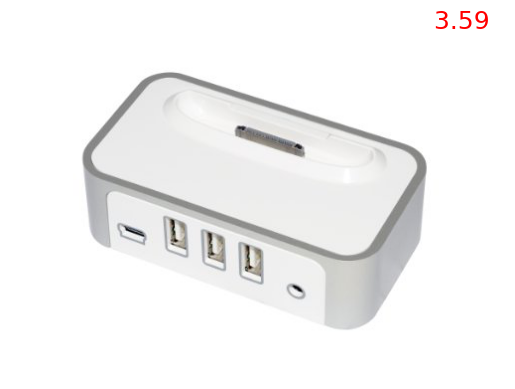

3900    B016K0PJ3Q
251     B00GYPEM2M
5232    B0178HOTOU
4603    B01G07W496
4120    B006LSQW4I
76      B0097AP9KK
511     B00T9RTDBM
4871    B018LWTYGO
4326    B00FEM3OKM
3855    B018V7VMNC
Name: asin, dtype: object

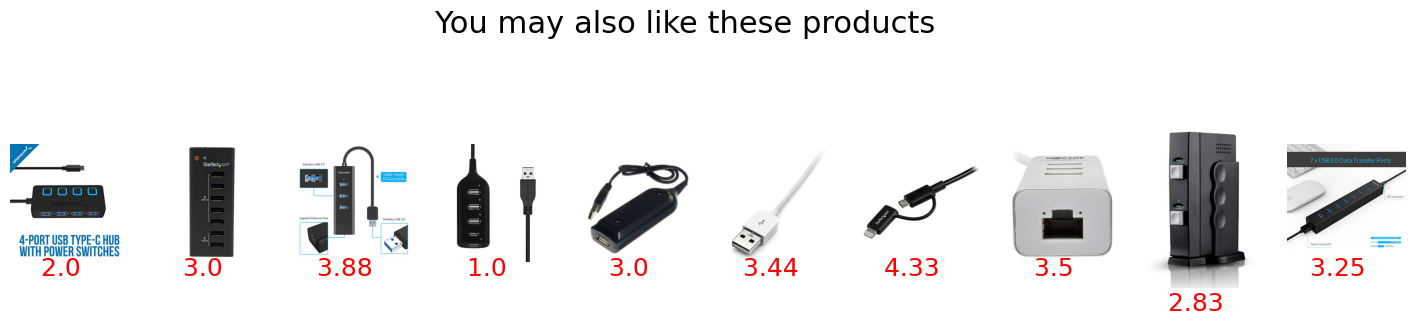

In [21]:
get_recommendations('B0006TIA8Y' , cosine_sim1  ,indices1)


In [22]:
count = CountVectorizer(stop_words='english')
count_matrix = count.fit_transform(df2['brand']+" "+ df2['category'])

In [23]:
count_matrix.shape

(5451, 6666)

In [24]:
cosine_sim2 = cosine_similarity(count_matrix,count_matrix)

In [27]:
import pickle
with open(r'C:\Users\Abdo\Desktop\last year\project\datasets\last datataset isa\cosine_sim2.pkl','wb') as f:
    pickle.dump(cosine_sim2, f)

In [28]:
with open(r'C:\Users\Abdo\Desktop\last year\project\datasets\last datataset isa\cosine_sim2.pkl','rb') as f:
    cosine_sim2 = pickle.load(f)

In [25]:
indices2 = pd.Series(df2.index, index=df2['asin'])

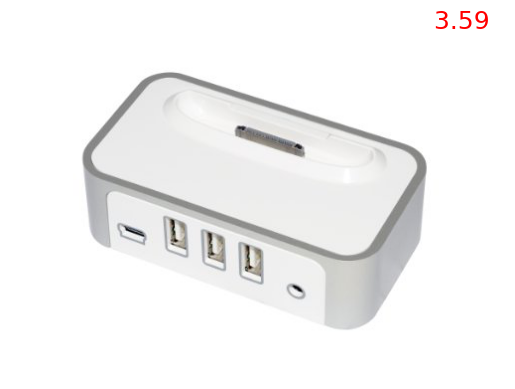

2      B0007OWNZO
7      B0011YO8S4
29     B0042FZ9K0
34     B00472M9F6
102    B00AUKBUHW
112    B00B1Q5LN8
146    B00CO3HCR0
156    B00DI2TKGM
276    B00HUIL310
281    B00HZDX42G
Name: asin, dtype: object

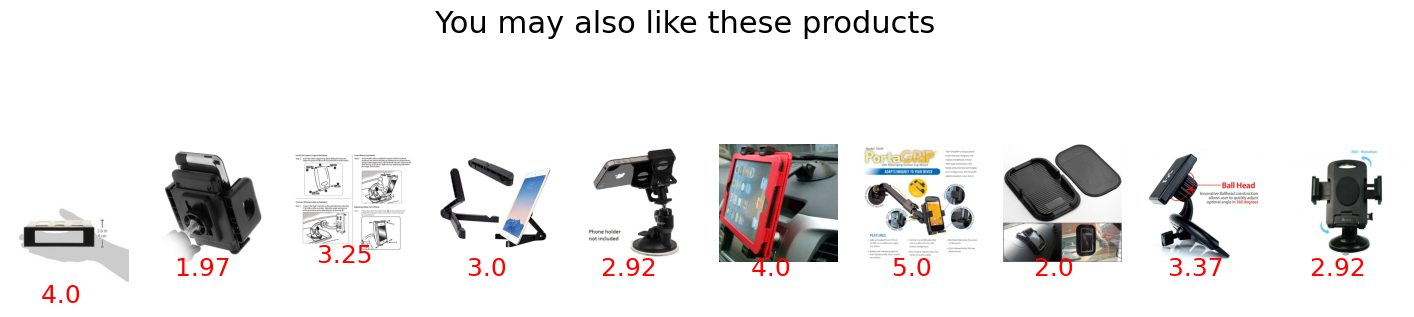

In [26]:
get_recommendations( 'B0006TIA8Y', cosine_sim2 , indices2 )

In [27]:
# if the input is new to the dataset and not yet calculate its cosine with other products
def tf_idftransformer (asin) :
    x = tfidf.transform(  df2[df2['asin']== asin]['description'] + " " +df2[df2['asin']== asin]['feature'] )
    cosine_sim = cosine_similarity(x, tfidf_matrix)
    #cosine_sim1 = cosine_sim1 + cosine_sim  
    indices = pd.Series(df2.index, index=df2['asin'])
    img_show_asin(asin)
    
    
    # Get the index of the movie that matches the asin number
    idx = indices[asin]

    # Get the similarity scores of all movies with that movie
    sim_scores = list(enumerate(cosine_sim[0]))

    # Sort the products based on the similarity scores
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # Get the scores of the 10 most similar products
    sim_scores = sim_scores[1:11] 

    # Get the movie indices
    product_indices = [i[0] for i in sim_scores]
    
    img_show_indices( product_indices)
                
    # Return the top 10 most similar movies
    return df2['asin'].iloc[product_indices]
    

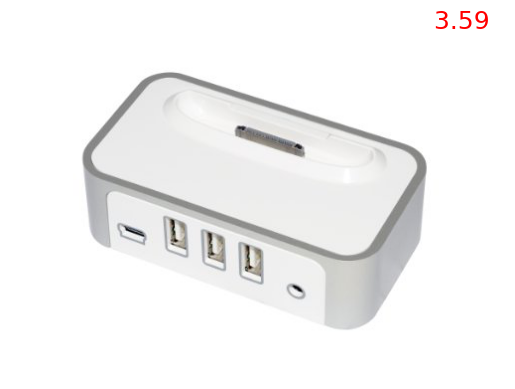

3900    B016K0PJ3Q
251     B00GYPEM2M
5232    B0178HOTOU
4603    B01G07W496
4120    B006LSQW4I
76      B0097AP9KK
511     B00T9RTDBM
4871    B018LWTYGO
4326    B00FEM3OKM
3855    B018V7VMNC
Name: asin, dtype: object

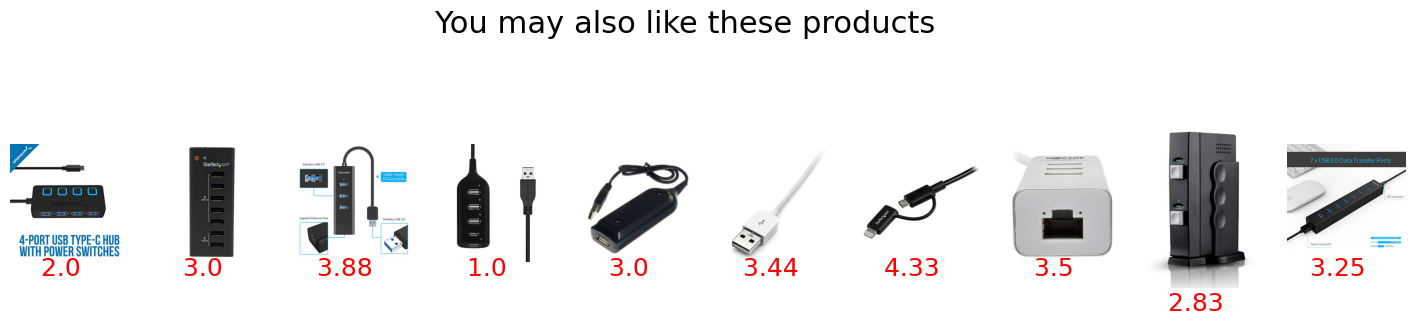

In [28]:
tf_idftransformer('B0006TIA8Y')

In [29]:
def count_transformer (asin) :
    x = count.transform(  df2[df2['asin']== asin]['brand'] + " " +df2[df2['asin']== asin]['category'] )
    cosine_sim = cosine_similarity(x, count_matrix)
    indices = pd.Series(df2.index, index=df2['asin'])
    img_show_asin(asin)
    
    
    # Get the index of the movie that matches the asin number
    idx = indices[asin]

    # Get the similarity scores of all movies with that movie
    sim_scores = list(enumerate(cosine_sim[0]))

    # Sort the products based on the similarity scores
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # Get the scores of the 10 most similar products
    sim_scores = sim_scores[1:11] 

    # Get the movie indices
    product_indices = [i[0] for i in sim_scores]
    
    img_show_indices( product_indices)
                
    # Return the top 10 most similar movies
    return df2['asin'].iloc[product_indices]

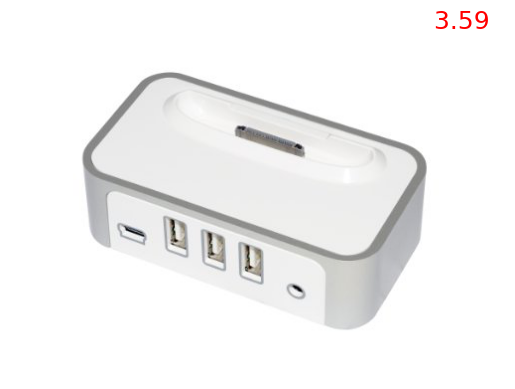

2      B0007OWNZO
7      B0011YO8S4
29     B0042FZ9K0
34     B00472M9F6
102    B00AUKBUHW
112    B00B1Q5LN8
146    B00CO3HCR0
156    B00DI2TKGM
276    B00HUIL310
281    B00HZDX42G
Name: asin, dtype: object

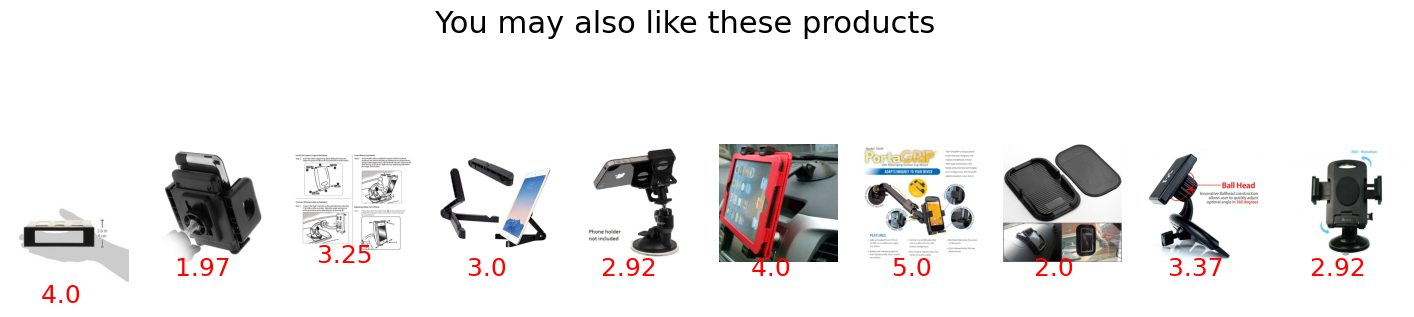

In [30]:
count_transformer('B0006TIA8Y')

# collaborative filtering with svd

In [31]:
from surprise.model_selection import train_test_split
from surprise import accuracy
from sklearn.metrics import r2_score
import numpy as np 
import pandas as pd
from surprise import Reader, Dataset, SVD , dump
from surprise.model_selection import cross_validate
from sklearn.metrics import confusion_matrix , classification_report
from sklearn import preprocessing
from collections import defaultdict
from surprise.model_selection import KFold
from sklearn.metrics import RocCurveDisplay
import os
import random
random.seed(42)
np.random.seed(42)

In [32]:
def precision_recall_at_k(predictions, k=10, threshold=3.5):
    """Return precision and recall at k metrics for each user"""

    # First map the predictions to each user.
    user_est_true = defaultdict(list)
    for uid, _, true_r, est, _ in predictions:
        user_est_true[uid].append((est, true_r))

    precisions = dict()
    recalls = dict()
    for uid, user_ratings in user_est_true.items():

        # Sort user ratings by estimated value
        user_ratings.sort(key=lambda x: x[0], reverse=True)

        # Number of relevant items
        n_rel = sum((true_r >= threshold) for (_, true_r) in user_ratings)

        # Number of recommended items in top k
        n_rec_k = sum((est >= threshold) for (est, _) in user_ratings[:k])

        # Number of relevant and recommended items in top k
        n_rel_and_rec_k = sum(
            ((true_r >= threshold) and (est >= threshold))
            for (est, true_r) in user_ratings[:k]
        )

        # Precision@K: Proportion of recommended items that are relevant
        # When n_rec_k is 0, Precision is undefined. We here set it to 0.

        precisions[uid] = n_rel_and_rec_k / n_rec_k if n_rec_k != 0 else 0

        # Recall@K: Proportion of relevant items that are recommended
        # When n_rel is 0, Recall is undefined. We here set it to 0.

        recalls[uid] = n_rel_and_rec_k / n_rel if n_rel != 0 else 0

    return precisions, recalls

In [33]:
def get_top_n(predictions, n):
    """Return the top-N recommendation for each user from a set of predictions.

    Args:
        predictions(list of Prediction objects): The list of predictions, as
            returned by the test method of an algorithm.
        n(int): The number of recommendation to output for each user. Default
            is 10.

    Returns:
    A dict where keys are user (raw) ids and values are lists of tuples:
        [(raw item id, rating estimation), ...] of size n.
    """

    # First map the predictions to each user.
    top_n = defaultdict(list)
    for uid, iid, true_r, est, _ in predictions:
        top_n[uid].append((iid, est))

    # Then sort the predictions for each user and retrieve the k highest ones.
    for uid, user_ratings in top_n.items():
        user_ratings.sort(key=lambda x: x[1], reverse=True)
        top_n[uid] = user_ratings[:n]

    return top_n

In [34]:
def collaborative_recommendation(userId , top_n):
    for asin in top_n[userId]:
        img_show_asin(asin[0])

In [35]:
ratings = pd.read_csv(r'C:\Users\Sigma\ecommerce\ratings8000.csv')
ratings

userId        asin  rating   timestamp
0      A2HM2RMX1CBZGM  B0006TIA8Y     1.0  1353024000
1      A2CQEJH6SN11EA  B0006TIA8Y     1.0  1204848000
2      A2JE174WR70HFD  B000M06LME     1.0  1450742400
3      A2ME0DNOOLVK2T  B000M06LME     1.0  1434326400
4       AB8G69EUC0UPZ  B000NO7NC6     1.0  1500681600
...               ...         ...     ...         ...
72063  A1ZT9RQMTBKTCK  B008RF0M9O     5.0  1409961600
72064  A2Q8T2BQOR0XW3  B005OK12HQ     5.0  1441670400
72065  A2A27XRH4MQJEQ  B0000CFPK8     5.0  1388620800
72066   AJCFIMQZR09BM  B00KIGV3C0     5.0  1464048000
72067  A3LMUTISAINC4D  B01DL9JEHG     5.0  1524009600

[72068 rows x 4 columns]

In [ ]:
#ratings = ratings.sort_values('Rating', ascending=True)
#ratings = ratings[ : 24844171-20100000]

In [36]:
reader = Reader(rating_scale=(1, 5))
data = Dataset.load_from_df(ratings[['userId', 'asin', 'rating']], reader)

In [37]:
svd = SVD(n_factors= 30 , n_epochs= 20 , lr_all = 0.005 , reg_all = 0.02 , random_state=42  )
cross_validate(svd, data, measures=["RMSE", "MAE"], cv=5, verbose=True)

Evaluating RMSE, MAE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    1.2187  1.2190  1.2341  1.2270  1.2292  1.2256  0.0060  
MAE (testset)     0.9935  1.0006  1.0111  1.0095  1.0072  1.0044  0.0065  
Fit time          0.41    0.40    0.41    0.40    0.42    0.41    0.01    
Test time         0.21    0.11    0.10    0.11    0.18    0.14    0.04    


{'test_rmse': array([1.21873639, 1.21904451, 1.23413957, 1.22703096, 1.22918864]),
 'test_mae': array([0.99352834, 1.00057014, 1.01105001, 1.00945501, 1.00722453]),
 'fit_time': (0.409928560256958,
  0.4030458927154541,
  0.4066953659057617,
  0.4012477397918701,
  0.421161413192749),
 'test_time': (0.20622611045837402,
  0.1063985824584961,
  0.10491418838500977,
  0.10510873794555664,
  0.17606735229492188)}

In [38]:
trainset, testset = train_test_split(data, test_size=0.20 , shuffle = True , random_state= 42 )

#trainset = data.build_full_trainset()
svd.fit(trainset)
#testset = trainset.build_testset()
predictions = svd.test(testset)

accuracy.rmse(predictions)
# Then compute RMSE
#trainset

RMSE: 1.2293


1.2292955908651528

In [39]:
y = []
for i in range(len(predictions)) :
  y.append(predictions[i].est)
y = pd.DataFrame(y)
y = y[0]
y

0        3.328600
1        3.164506
2        2.894644
3        2.906778
4        3.455007
           ...   
14409    3.181246
14410    1.964543
14411    3.419756
14412    2.366733
14413    3.235199
Name: 0, Length: 14414, dtype: float64

In [40]:
df = pd.DataFrame(testset)
x = df[2]
x

0        1.0
1        3.0
2        2.0
3        3.0
4        3.0
        ... 
14409    3.0
14410    1.0
14411    4.0
14412    1.0
14413    2.0
Name: 2, Length: 14414, dtype: float64

In [41]:
r2_score(x,y)

0.23975597299321105

In [42]:
def thresh (num , thresh = 2.5):
    if num >  thresh:
        return 1
    else:
        return 0

In [43]:
pred= y.apply(thresh)
pred

0        1
1        1
2        1
3        1
4        1
        ..
14409    1
14410    0
14411    1
14412    0
14413    1
Name: 0, Length: 14414, dtype: int64

In [44]:
y_test = x.apply(thresh)

In [45]:
y_test

0        0
1        1
2        0
3        1
4        1
        ..
14409    1
14410    0
14411    1
14412    0
14413    0
Name: 2, Length: 14414, dtype: int64

In [46]:
print(classification_report(y_test, pred ))

              precision    recall  f1-score   support

           0       0.82      0.31      0.45      4836
           1       0.73      0.97      0.83      9578

    accuracy                           0.75     14414
   macro avg       0.78      0.64      0.64     14414
weighted avg       0.76      0.75      0.70     14414



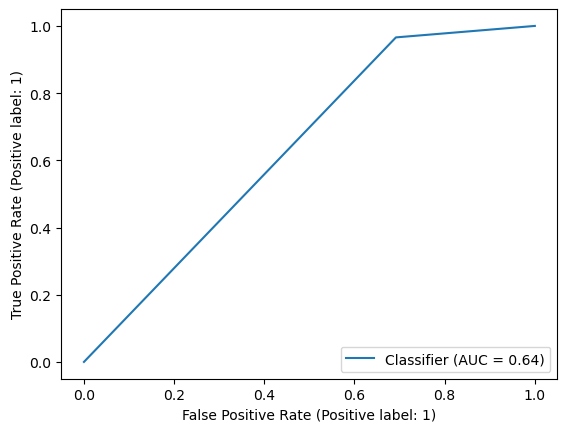

In [47]:
RocCurveDisplay.from_predictions(y_test , pred)

In [48]:
ratings['rating'].value_counts()

3.0    17097
4.0    16128
5.0    15310
1.0    14260
2.0     9273
Name: rating, dtype: int64

In [49]:
precisions, recalls = precision_recall_at_k(predictions, k= 10, threshold=2.5)

In [50]:
print(sum(prec for prec in precisions.values()) / len(precisions))
print(sum(rec for rec in recalls.values()) / len(recalls))

0.6407101019321466
0.6522408590699326


In [51]:
svd.predict('A2HM2RMX1CBZGM','B0006TIA8Y')

Prediction(uid='A2HM2RMX1CBZGM', iid='B0006TIA8Y', r_ui=None, est=3.2584993474002317, details={'was_impossible': False})

In [52]:
# return the products that has not been rated yet
def build_anti_testset(self, userId, fill=None ):
        """Return a list of ratings that can be used as a testset in the
        :meth:`test() <surprise.prediction_algorithms.algo_base.AlgoBase.test>`
        method.

        The ratings are all the ratings that are **not** in the trainset, i.e.
        all the ratings :math:`r_{ui}` where the user :math:`u` is known, the
        item :math:`i` is known, but the rating :math:`r_{ui}`  is not in the
        trainset. As :math:`r_{ui}` is unknown, it is either replaced by the
        :code:`fill` value or assumed to be equal to the mean of all ratings
        :meth:`global_mean <surprise.Trainset.global_mean>`.

        Args:
            fill(float): The value to fill unknown ratings. If :code:`None` the
                global mean of all ratings :meth:`global_mean
                <surprise.Trainset.global_mean>` will be used.

        Returns:
            A list of tuples ``(uid, iid, fill)`` where ids are raw ids.
        """
        fill = self.global_mean if fill is None else float(fill)

        anti_testset = []
        user_items = {j for (j, _) in self.ur[userId]}
        anti_testset += [
                (self.to_raw_uid(real_trainset.to_inner_uid(userId)), self.to_raw_iid(i), fill)
                for i in self.all_items()
                if i not in user_items
            ]
        return anti_testset

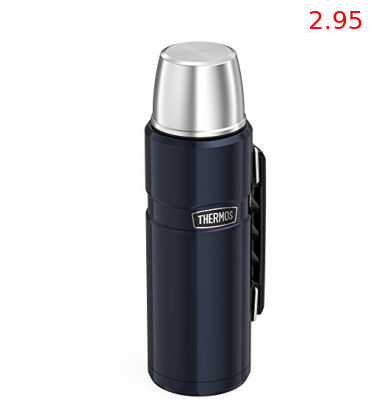

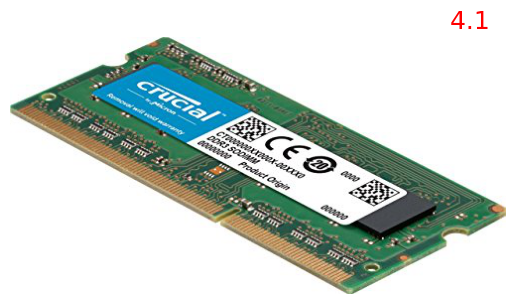

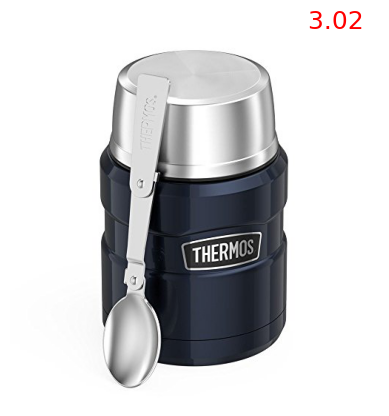

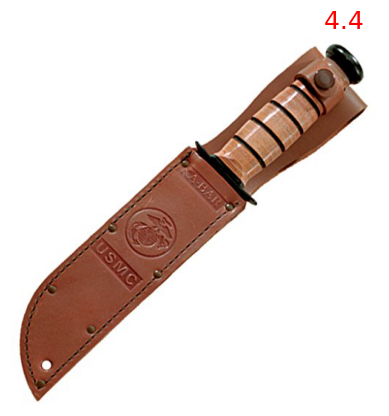

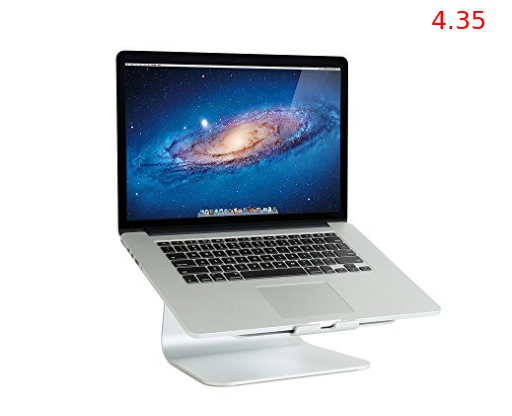

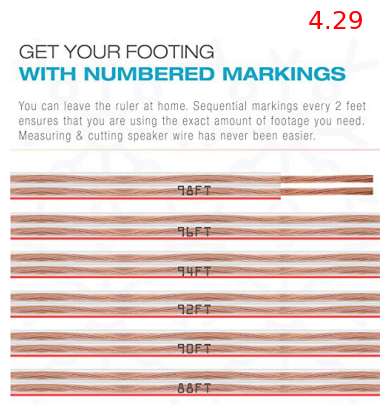

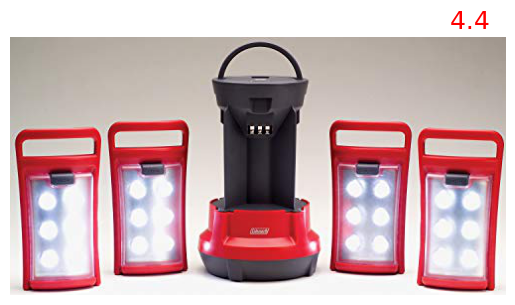

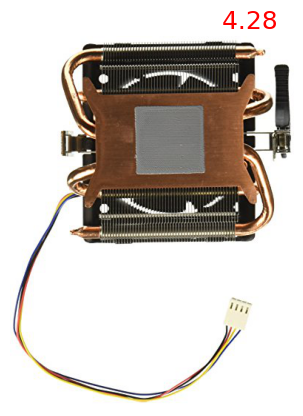

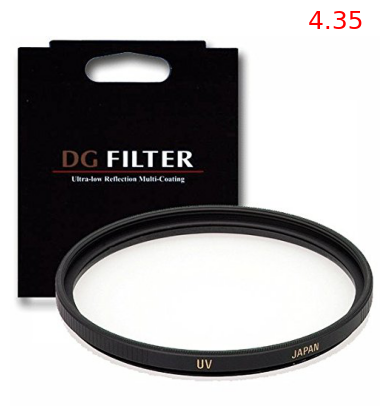

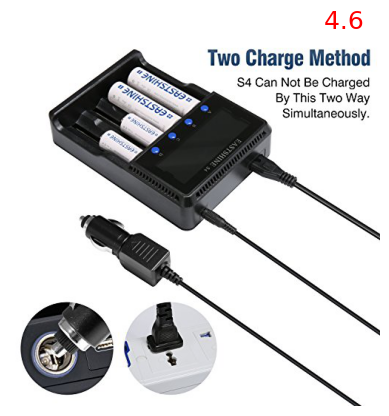

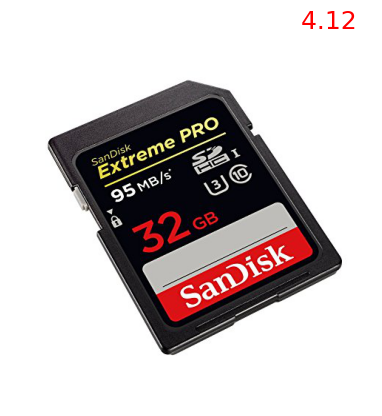

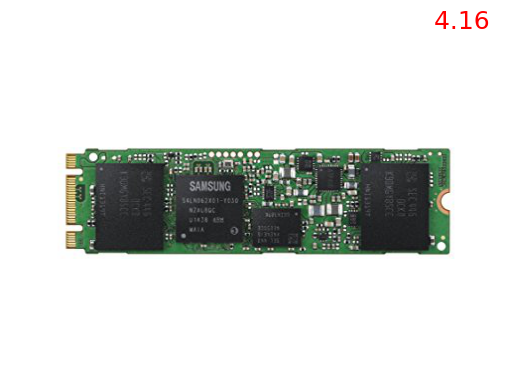

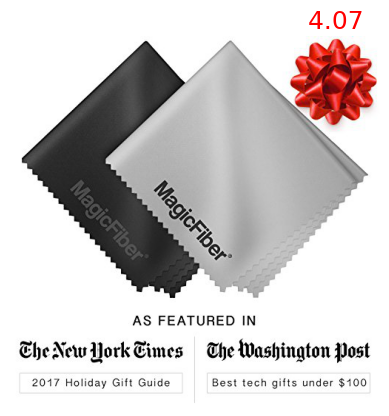

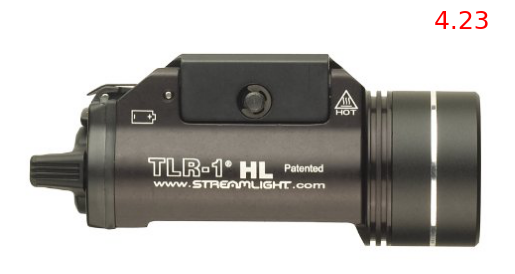

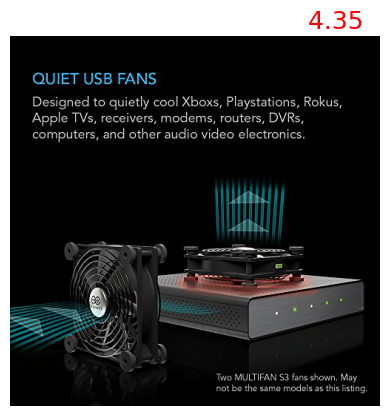

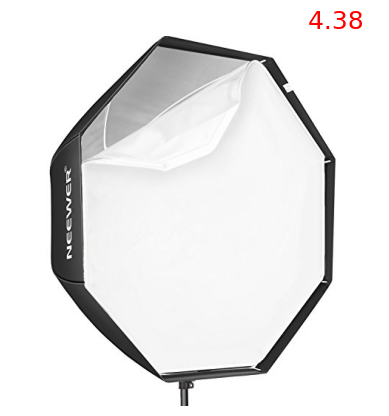

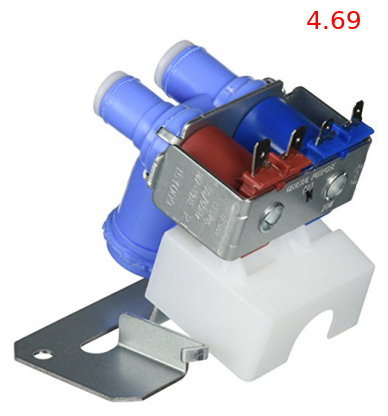

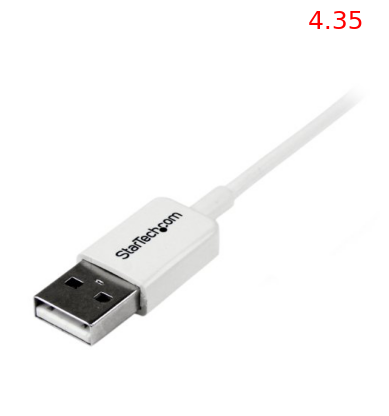

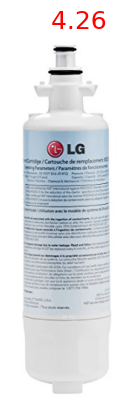

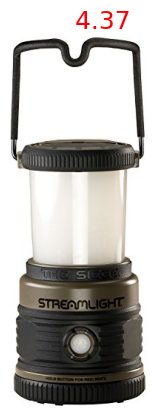

In [53]:
real_trainset = data.build_full_trainset()
svd.fit(real_trainset)
real_testset = build_anti_testset(real_trainset   , 'A2HM2RMX1CBZGM' )
predictions = svd.test(real_testset)
top_n = get_top_n(predictions, n=20)
collaborative_recommendation('A2HM2RMX1CBZGM' , top_n)

In [54]:
file_name = os.path.expanduser(r"C:\Users\Abdo\Desktop\last year\project\datasets\last datataset isa\dump_file")
dump.dump(file_name, algo=svd)
_, loaded_algo = dump.load(file_name)

FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\Abdo\\Desktop\\last year\\project\\datasets\\last datataset isa\\dump_file'

# embedding

In [55]:
from keras.layers import Input, Embedding, Flatten, Dot, Dense , Concatenate , StringLookup, BatchNormalization,Dropout
from keras.models import Model , load_model
from sklearn.model_selection import train_test_split
import tensorflow as tf
tf.random.set_seed(42)

In [63]:
ratings_dataset = pd.read_csv(r'C:\Users\Sigma\ecommerce\ratings8000.csv')

In [64]:
ratings_dataset.userId.value_counts()

A25C30G90PKSQA    206
A3TMNU7VNK5JJE    206
A1WD61B0C3KQZB    103
A21TPY9BVC9IKZ     44
AMY6O4Z9HINO0      39
                 ... 
A2BDD9MUNREMBR      2
A2FVEA3WIO0TK3      2
A1N2RY1T771LTH      2
AT2S0U3WX36OE       2
ARJEHF00TBVBD       2
Name: userId, Length: 32748, dtype: int64

In [65]:
train, test = train_test_split(ratings_dataset, test_size=0.2, random_state=42 , shuffle=True)
n_users = len(ratings_dataset['userId'].unique())
n_items = len(ratings_dataset['asin'].unique())

In [66]:
userId_lookup = StringLookup(vocabulary = ratings_dataset['userId'].unique(), mask_token = None )
asin_lookup = StringLookup(vocabulary = ratings_dataset['asin'].unique(), mask_token = None )


# creating item embedding
item_input = Input(shape=[1], name="Item-Input" , dtype= object)
item_input1 = asin_lookup(item_input)
item_embedding = Embedding(n_items+1, 8, name="Item-Embedding")(item_input1) # fourth root of unique values
item_vec = Flatten(name="Flatten-Items")(item_embedding)

# creating user embedding
user_input = Input(shape=[1], name="User-Input" , dtype= object)
user_input1 = userId_lookup(user_input)
user_embedding = Embedding(n_users+1, 8, name="User-Embedding")(user_input1)
user_vec = Flatten(name="Flatten-Users")(user_embedding)


prod = Dot(name="Dot-Product", axes=1)([item_vec, user_vec])

# concatenate features
conc = Concatenate()([item_vec, user_vec])

# add fully-connected-layers
fc1 = Dense(64, activation='relu')(conc)

fc1_bn = BatchNormalization(name='batch-norm-1')(fc1)
fc1_dropout = Dropout(0.5)(fc1_bn)

fc2 = Dense(16, activation='relu')(fc1_dropout)

fc2_bn = BatchNormalization(name='batch-norm-2')(fc2)
fc2_dropout = Dropout(0.5)(fc2_bn)

pred_mlp = Dense(8, name='pred-mlp', activation='relu')(fc2_dropout)

fc3 = Concatenate()([prod, pred_mlp])

out = Dense(1 , activation='sigmoid' )(fc3)

# Create model and compile it
model2 = Model([user_input, item_input], out)
model2.compile(optimizer='adam', loss='binary_crossentropy'  , metrics= ['accuracy'])

In [67]:
labels = train['rating'].apply(thresh)

Epoch 1/8
901/901 [==============================] - 8s 7ms/step - loss: 0.6868 - accuracy: 0.6122
Epoch 2/8
901/901 [==============================] - 6s 7ms/step - loss: 0.6035 - accuracy: 0.6849
Epoch 3/8
901/901 [==============================] - 6s 7ms/step - loss: 0.4589 - accuracy: 0.8003
Epoch 4/8
901/901 [==============================] - 6s 7ms/step - loss: 0.2787 - accuracy: 0.8918
Epoch 5/8
901/901 [==============================] - 7s 7ms/step - loss: 0.1968 - accuracy: 0.9194
Epoch 6/8
901/901 [==============================] - 7s 8ms/step - loss: 0.1578 - accuracy: 0.9327
Epoch 7/8
901/901 [==============================] - 7s 8ms/step - loss: 0.1344 - accuracy: 0.9420
Epoch 8/8
901/901 [==============================] - 7s 8ms/step - loss: 0.1160 - accuracy: 0.9509


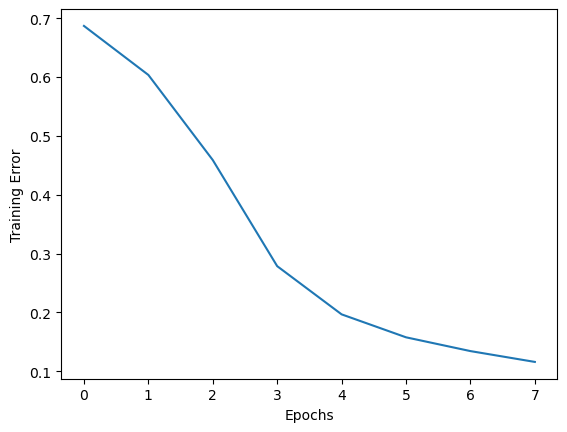

In [68]:
if os.path.exists(r'C:\Users\Sigma\ecommerce\embedding_model.h5'):
    model2 = load_model(r'C:\Users\Sigma\ecommerce\embedding_model.h5')
else:
    history = model2.fit([train.userId, train.asin], labels, batch_size=64  , epochs=8 ,  verbose=1)
    model2.save(r'C:\Users\Sigma\ecommerce\embedding_model.h5')
    plt.plot(history.history['loss'])
    plt.xlabel("Epochs")
    plt.ylabel("Training Error")

In [69]:
labels1 = test['rating'].apply(thresh)

In [70]:
model2.evaluate([test.userId, test.asin], labels1)

451/451 [==============================] - 1s 2ms/step - loss: 1.1192 - accuracy: 0.7760


[1.1192357540130615, 0.7759816646575928]

In [71]:
predictions = model2.predict([test['userId'].head(10), test['asin'].head(10)])

[print(predictions[i], test.rating.iloc[i]) for i in range(0,10)]

1/1 [==============================] - 0s 136ms/step
[0.8403145] 4.0
[0.0450426] 3.0
[0.00020489] 2.0
[5.8732905e-05] 1.0
[0.99788874] 3.0
[0.86110055] 5.0
[0.02352372] 1.0
[0.00137502] 4.0
[0.00145671] 1.0
[0.99929285] 3.0


[None, None, None, None, None, None, None, None, None, None]

In [72]:
item_data = np.array(list(set(ratings_dataset.asin)))
item_data[:5]

array(['B00YAO43YG', 'B00KJGZ5JQ', 'B0002J1LE8', 'B00F8D6440',
       'B00LQDI048'], dtype='<U10')

In [73]:
# predict for user 'AZB4CQ9JZSUQB'
user = np.array(['AZB4CQ9JZSUQB' for i in range(len(item_data))])
user[:5]

array(['AZB4CQ9JZSUQB', 'AZB4CQ9JZSUQB', 'AZB4CQ9JZSUQB', 'AZB4CQ9JZSUQB',
       'AZB4CQ9JZSUQB'], dtype='<U13')

In [74]:
predictions = model2.predict([user, item_data])

predictions = np.array([a[0] for a in predictions])

recommended_indices = (-predictions).argsort()[:5]

# print the best five items 
print(item_data[recommended_indices])


171/171 [==============================] - 0s 1ms/step
['B006SK0SP8' 'B00F7QKHFA' 'B014U488RI' 'B001DKBC62' 'B00J7INK0S']


In [75]:
predictions[recommended_indices]

array([0.9999997 , 0.99999946, 0.9999989 , 0.9999985 , 0.99999845],
      dtype=float32)

In [76]:
df2[df2['asin'].isin(item_data[recommended_indices])]

category  \
211   ['Cell Phones & Accessories', 'Accessories', '...   
636   ['Cell Phones & Accessories', 'Cases, Holsters...   
1845  ['Sports & Outdoors', 'Sports & Fitness', 'Hun...   
2295  ['Sports & Outdoors', 'Sports & Fitness', 'Hun...   
4095  ['Electronics', 'Computers & Accessories', 'Ta...   

                                                  tech1  \
211    class="a-keyvalue prodDetTable" role="present...   
636                                                 NaN   
1845                                                NaN   
2295   class="a-keyvalue prodDetTable" role="present...   
4095   class="a-keyvalue prodDetTable" role="present...   

                                            description  fit  \
211   ['<div class="aplus"> <div class="leftImage" s...  NaN   
636                                  ['<b>Description']  NaN   
1845  ['THIS IS ONE OF THE FINEST INSIDE THE PANTS, ...  NaN   
2295  ['Specifically Built for Anything that Needs t...  NaN   
4095  ['Skinny Cover for iPad Air. Two viewing angle...  NaN   

                                                  title  \
211   StarTech.com 1U 12 Port Wall Mount Cat5e 110 P...   
636   Galaxy Note 5 Case, POETIC Affinity Series [Pr...   
1845  Pro Carry Glock 19 x 19 23 32 36 LT CCW IWB Le...   
2295  CRKT S.P.E.W. EDC Fixed Blade Knife with Sheat...   
4095  Acme Made Skinny Cover for iPad Air, Matte Bla...   

                                               also_buy tech2  \
211                                                  []   NaN   
636                                                  []   NaN   
1845  ['B0062CB360', 'B00TBJIT2M', 'B0014VX2M2', 'B0...   NaN   
2295  ['B0030IT76C', 'B0768WQLSJ', 'B00I04SPS2', 'B0...   NaN   
4095                                                 []   NaN   

                            brand  \
211                      StarTech   
636                        Poetic   
1845                    Pro Carry   
2295  Columbia River Knife & Tool   
4095                    Acme Made   

                                                feature  \
211   ['Charge or sync your Micro USB devices with t...   
636   ['Made of Clear Polycarbonate molded with Soft...   
1845  ['Lightweight', 'Soft', 'Quality Leather', 'Me...   
2295  ['Bead Blast Blade Finish', 'Compact Utility N...   
4095  ['Slim & Protective The ultra-thin design beli...   

                                                   rank  ... details  \
211   ['>#573,050 in Cell Phones & Accessories (See ...  ...      {}   
636   ['>#392,404 in Cell Phones & Accessories (See ...  ...      {}   
1845             240,229 in Clothing, Shoes & Jewelry (  ...      {}   
2295  ['>#11,840 in Tools & Home Improvement (See to...  ...      {}   
4095  ['>#77,044 in Computers & Accessories > Tablet...  ...      {}   

                                               main_cat  \
211                                           Computers   
636                                           Computers   
1845  <img src="https://images-na.ssl-images-amazon....   
2295                           Tools & Home Improvement   
4095                                          Computers   

                                           similar_item  \
211                                                 NaN   
636    class="a-bordered a-horizontal-stripes  a-spa...   
1845                                                NaN   
2295                                                NaN   
4095                                                NaN   

                                                   date   price        asin  \
211                                  September 16, 2013   $6.74  B00F7QKHFA   
636                                   November 25, 2015   $7.95  B014U488RI   
1845  <div class="a-fixed-left-grid a-spacing-none">...  $19.95  B001DKBC62   
2295                                  September 1, 2011  $19.98  B006SK0SP8   
4095                                      April 1, 2014  $24.95  B00J7INK0S   

          

# recommendation for images

In [82]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt # plotting
import matplotlib.image as mpimg
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os # accessing directory structure
import tensorflow as tf
import keras
from keras import Model
from tensorflow.keras.applications import ResNet50
from keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions
from keras.layers import GlobalMaxPooling2D
import cv2
import urllib.request
from tensorflow.keras.utils import img_to_array
cv2.__version__

'4.7.0'

In [83]:
# Input Shape
img_width, img_height, _ = 224, 224, 3 #load_image(df.iloc[0].image).shape

# Pre-Trained Model
base_model = ResNet50(weights='imagenet', 
                      include_top=False, 
                      input_shape = (img_width, img_height, 3))
base_model.trainable = False

# Add Layer Embedding
model = keras.Sequential([
    base_model,
    GlobalMaxPooling2D()
])

model.summary()

94765736/94765736 [==============================] - 30s 0us/step
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 7, 7, 2048)        23587712  
                                                                 
 global_max_pooling2d (Globa  (None, 2048)             0         
 lMaxPooling2D)                                                  
                                                                 
Total params: 23,587,712
Trainable params: 0
Non-trainable params: 23,587,712
_________________________________________________________________


In [95]:
def get_embedding(model, asin):
    # Reshape
    
    #response = requests.get(literal_eval(df2[df2['asin'] == asin]['imageURLHighRes'].values[0])[0])
    #img = Image.open(BytesIO(response.content))
    
    with urllib.request.urlopen(literal_eval(df2[df2['asin'] == asin]['imageURLHighRes'].values[0])[0]) as url:
        s = url.read()
    
    #req = urllib.urlopen(literal_eval(df2[df2['asin'] == asin]['imageURLHighRes'].values[0])[0])
    arr = np.asarray(bytearray(s), dtype=np.uint8)
    
    img = cv2.imdecode(arr, -1) # 'Load it as it is'
    print(img.shape())
    
    #img = tf.keras.utils.load_img(img, target_size=(img_width, img_height))
    
    width = 224
    height = 224
    
    dsize = (width, height)
    output = cv2.resize(img, dsize)
    
    # img to Array
    x   = img_to_array(output)
    # Expand Dim (1, w, h)
    x   = np.expand_dims(x, axis=0)
    # Pre process Input
    x   = preprocess_input(x)
    return model.predict(x,verbose=False).reshape(-1)

In [85]:
emb = get_embedding(model, "B00EZ6L6B2")
emb.shape

1/1 [==============================] - 1s 978ms/step


(2048,)

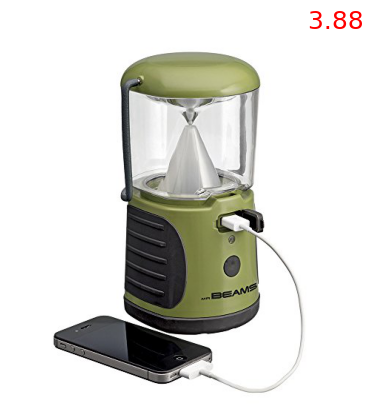

In [86]:
img_show_asin("B00EZ6L6B2")

In [97]:
df_sample      = df2
map_embeddings = df_sample['asin'].apply(lambda img: get_embedding(model, img))
df_embs        = map_embeddings.apply(pd.Series)

KeyboardInterrupt: 

In [311]:
def img_show_asin1(asin):
    response = requests.get(literal_eval(df2[df2['asin'] == asin]['imageURLHighRes'].values[0])[0])
    img = Image.open(BytesIO(response.content))
    plt.imshow(img)
   #print(np.shape(img))
    width = 224
    height = 224
    dsize = (width, height)
    output = cv2.resize(src, dsize)
    plt.title(label= '{}  '.format(round(df2[df2['asin'] == asin]['vote_average'].values[0],2)) ,
          loc="right",
          color='red' , fontsize=18)
    plt.axis('off')
    plt.show()

(333, 500, 3)


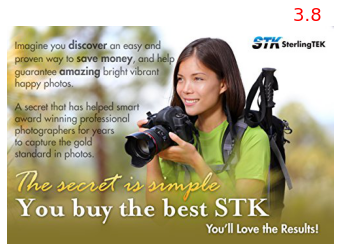

In [314]:
img_show_asin1("B009PBUK9Q")

# handling ratings

In [ ]:
meta = pd.read_csv(r'C:\Users\Abdo\Desktop\mini_metadata32000.csv')

In [ ]:
ratings = pd.read_csv(r'C:\Users\Abdo\Desktop\last year\project\datasets\Books.csv')

In [ ]:
ratings

In [ ]:
ratings.columns = ['userId' ,'asin',  'rating' , 'timestamp']

In [ ]:
ratings.columns = ['asin', 'userId' , 'rating' , 'timestamp']

In [ ]:
ratings = ratings[['userId','asin' , 'rating' , 'timestamp']]

In [ ]:
ratings

In [ ]:
y = ratings['userId'].value_counts()
y

In [ ]:
maping = pd.DataFrame(ratings['userId'].value_counts())
condition = maping[(maping['userId'] >= 35) &(maping['userId'] <= 1000)].index

In [ ]:
condition

In [ ]:
ratings = ratings[ratings['userId'].isin(condition)]

In [ ]:
ratings

In [ ]:
maping2 = pd.DataFrame(ratings['asin'].value_counts())
condition2 = maping2[(maping2['asin'] >= 35)&  (maping2['asin'] <= 1000) ].index

In [ ]:
condition2

In [ ]:
ratings = ratings[ratings['asin'].isin(condition2)]

In [ ]:
t = ratings['asin'].unique()
len(t)

In [ ]:
t

In [ ]:
ratings['userId'].value_counts()

In [ ]:
ratings['asin'].value_counts()

In [ ]:
meta = meta.drop('asin', axis=1)

In [ ]:
meta['asin'] = t[0:31858]

In [ ]:
ratings = ratings[ratings['asin'].isin(meta['asin'])]

In [ ]:
meta.to_csv(r'C:\Users\Abdo\Desktop\last_mini_metadata32000.csv' , index=False)

In [ ]:
ratings.rename(columns = {'movieId':'asin'}, inplace = True)

In [ ]:
ratings['rating'].value_counts()

In [ ]:
ratings = ratings[ratings['rating'] != 0]

In [ ]:
#ratings = ratings[:19536645-2800000]

In [ ]:
ratings['rating'].value_counts()

In [ ]:
len(ratings['asin'].unique())

In [ ]:
ratings['asin'].value_counts()

In [ ]:
x = 0
y = ratings['userId'].value_counts()
y

In [ ]:
for i in range(31858):
    if (y.iloc[i] == 1 ):
        x = x + 1

In [ ]:
x

In [ ]:
ratings.to_csv(r'C:\Users\Abdo\Desktop\moviesonly32000.csv' , index=False)

In [ ]:
ratings

In [ ]:
ratings[:22163126-2000000]['asin'].value_counts().tail(100)

In [ ]:
ratings = ratings[:22163126-2000000]